# NR7 Strategy

1. Identify the lowest range day among the last 6 trading days. 
2. Go long at the close if today's range is the narrowest. 
3. Exit at the close when today's close is higher than yesterday's high.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Importing the dataset
data = pd.read_csv('./Candle_data/^NSEI-MAX.csv', index_col=0, parse_dates=True)
data = data.dropna()
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

print(data.head())
print('#' * 30)
print(data.tail())
print('#' * 30)
print(data.info())

                   Open         High          Low        Close  Volume
Date                                                                  
2007-09-17  4518.450195  4549.049805  4482.850098  4494.649902     0.0
2007-09-18  4494.100098  4551.799805  4481.549805  4546.200195     0.0
2007-09-19  4550.250000  4739.000000  4550.250000  4732.350098     0.0
2007-09-20  4734.850098  4760.850098  4721.149902  4747.549805     0.0
2007-09-21  4752.950195  4855.700195  4733.700195  4837.549805     0.0
##############################
                    Open          High           Low         Close    Volume
Date                                                                        
2023-12-04  20601.949219  20702.650391  20507.750000  20686.800781  381100.0
2023-12-05  20808.900391  20864.050781  20711.150391  20855.099609  421000.0
2023-12-06  20950.750000  20961.949219  20852.150391  20937.699219  359200.0
2023-12-07  20932.400391  20941.250000  20850.800781  20901.150391  275000.0
2023-12-08

In [3]:
# Strategy rules,
# 1. Identify the lowest range day among the last 6 trading days. 
# 2. Go long at the close if today's range is the narrowest. 
# 3. Exit at the close when today's close is higher than yesterday's high.

# 1. Identify the lowest range day among the last 6 trading days.
data['Range'] = data['High'] - data['Low']

returns =[]
# Loop through the data and create buy and sell orders
for i in range(6, len(data)):
    # 2. Go long at the close if today's range is the narrowest.
    if data['Range'][i] < min(data['Range'][i-6:i]):
        # print('Buy at the close: ', data['Close'][i])
        # Buy at the close
        buy_price = data['Close'][i]
        # 3. Exit at the close when today's close is higher than yesterday's high.
        sell_price = data['Close'][i+1]
        returns.append(sell_price - buy_price)
    else:
        returns.append(0)
# print(returns)

# Calculate the total returns
total_returns = np.sum(returns)
print('Total returns: ', total_returns)

Total returns:  1184.801036000004


In [10]:
# Calculate the number of trades
num_trades = len(list(filter(lambda x: x != 0, returns)))
print('Number of trades: ', num_trades)

# Calculate the average returns
avg_returns = total_returns / num_trades
print('Average returns: ', avg_returns)

# Calculate the winning trades
winning_trades = len(list(filter(lambda x: x > 0, returns)))
print('Winning trades: ', winning_trades)

# Calculate the sharpe ratio
sharpe_ratio_after_costs = np.sqrt(252) * ((avg_returns - 0.007) / np.std(returns))
print('Sharpe ratio: ', sharpe_ratio_after_costs)

# Calculate the maximum drawdown
cum_returns = np.cumsum(returns)
highwatermark = np.maximum.accumulate(cum_returns)
drawdown = cum_returns - highwatermark
max_drawdown = np.max(drawdown)
print('Maximum drawdown: ', max_drawdown)

# Calculate the maximum drawdown duration
drawdown_duration = np.argmax(drawdown)
print('Maximum drawdown duration: ', drawdown_duration)

# Calculate the average returns per trade
avg_returns_per_trade = total_returns / num_trades
print('Average returns per trade: ', avg_returns_per_trade)

Number of trades:  612
Average returns:  1.9359494052287647
Winning trades:  309
Sharpe ratio:  0.7370179936062535
Maximum drawdown:  0.0
Maximum drawdown duration:  0
Average returns per trade:  1.9359494052287647


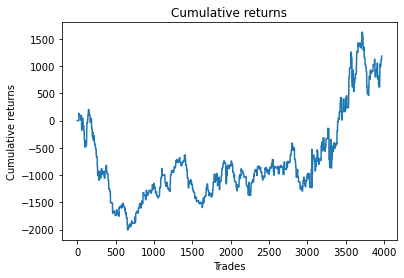

In [21]:
# Plot the cumulative returns
import matplotlib.pyplot as plt
plt.plot(cum_returns)
plt.title('Cumulative returns')
plt.xlabel('Trades')
plt.ylabel('Cumulative returns')
plt.show()